In [185]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, models, layers, Sequential

In [186]:
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0

In [187]:
x_train = xtrain[..., tf.newaxis]
x_test = xtest[..., tf.newaxis]

In [188]:
print(x_train.shape)
print(x_test.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


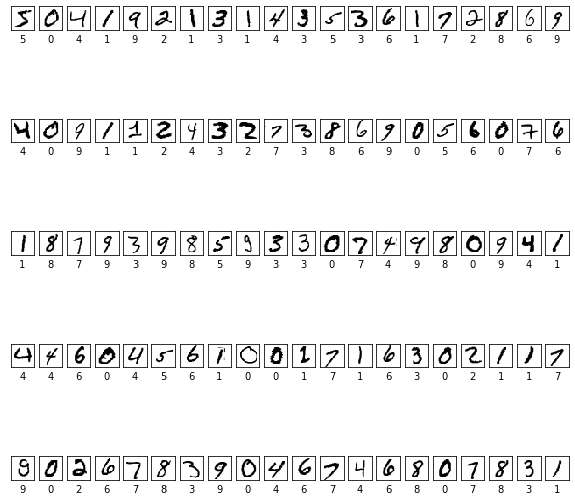

In [175]:
plt.figure(figsize = (10, 10))
for i in range(100):
    plt.subplot(5, 20, i+ 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap = plt.cm.binary)
    plt.xlabel(ytrain[i])
    
plt.show()

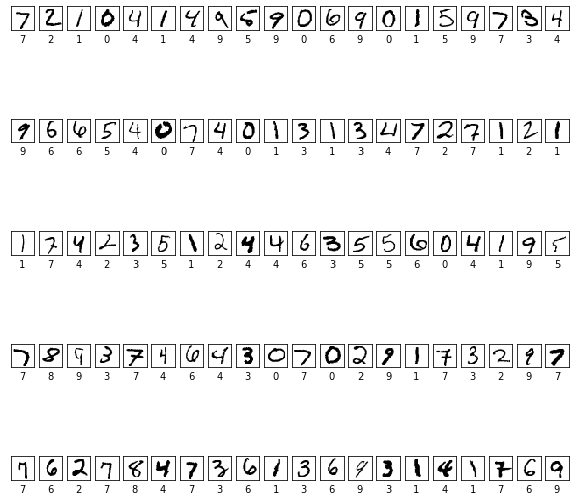

In [176]:
plt.figure(figsize = (10, 10))
for i in range(100):
    plt.subplot(5, 20, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtest[i], cmap = plt.cm.binary)
    plt.xlabel(ytest[i])
plt.show()

In [189]:
num_validation_samples = 0.1 * x_train.shape[0]
num_validation_samples = int(num_validation_samples)
num_validation_samples

6000

In [190]:
validation_inputs = x_train[:num_validation_samples,:,:]
train_inputs = x_train[num_validation_samples:,:,:]
validation_targets = ytrain[:num_validation_samples]
train_targets = ytrain[num_validation_samples:]


print(validation_inputs.shape, validation_targets.shape)
print(train_inputs.shape, train_targets.shape)


(6000, 28, 28, 1) (6000,)
(54000, 28, 28, 1) (54000,)


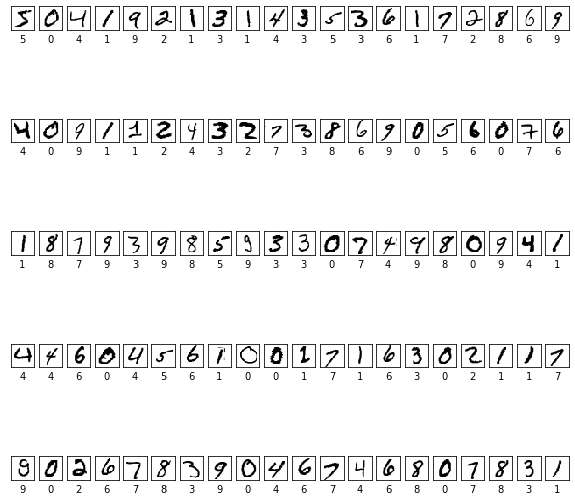

In [27]:
plt.figure(figsize = (10, 10))
for i in range(100):
    plt.subplot(5, 20, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_inputs[i], cmap = plt.cm.binary)
    plt.xlabel(validation_targets[i])
    
plt.show()

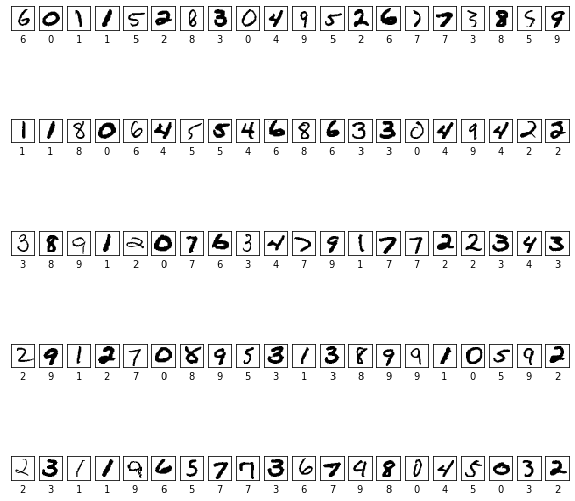

In [28]:
plt.figure(figsize = (10, 10))
for i in range(100):
    plt.subplot(5, 20, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap = plt.cm.binary)
    plt.xlabel(train_targets[i])
    
plt.show()

In [191]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_inputs, train_targets)).shuffle(10000).batch(100)

validation_ds = tf.data.Dataset.from_tensor_slices((validation_inputs, validation_targets)).shuffle(10000).batch(num_validation_samples)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, ytest)).batch(x_test.shape[0])

print(train_ds)
#print(train_targets.shape)

print(validation_ds)
#print(validation_targets.shape)

print(test_ds)
#print(test_targets.shape)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>
<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>
<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>


In [71]:
#batch_size = 100

#train_inputs, train_targets = next_batch(int(train_inputs.shape[0] / batch_size), train_inputs, train_targets)
#train_targets = train_targets.batch(batch_size)

#validation_inputs, validation_targets = next_batch(int(validation_inputs.shape[0]), validation_inputs, validation_targets)
#validation_targets = validation_targets.batch(validation_inputs.shape[0])

#test_inputs, test_targets = next_batch(int(test_inputs.shape[0]), test_inputs, test_targets)
#test_targets = ytest.batch(test_inputs.size[0])

#print(train_inputs.shape)
#print(train_targets.shape)

#print(validation_inputs.shape)
#print(validation_targets.shape)

#print(test_inputs.shape)
#print(test_targets.shape)

In [83]:
#train_ds = np.expand_dims(train_ds, axis = -1)
#validation_ds = np.expand_dims(validation_ds, axis = -1)
#test_ds = np.expand_dims(test_ds, axis = -1)
#train_ds = train_ds[..., tf.newaxis]
#validation_ds = validation_ds[..., tf.newaxis]
#test_ds = test_ds[..., tf.newaxis]

#print(train_ds)
#print(validation_ds)
#print(test_ds)

In [192]:
model = Sequential([
    
    layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape= (28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_12 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)             

In [193]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [194]:
max_epochs = 5

model.fit(train_ds, validation_data = (validation_ds), epochs = max_epochs)

Train for 540 steps, validate for 1 steps
Epoch 1/5
540/540 [==============================] - 89s 164ms/step - loss: 0.1912 - accuracy: 0.9378 - val_loss: 0.0557 - val_accuracy: 0.9835
Epoch 2/5
540/540 [==============================] - 87s 161ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 3/5
540/540 [==============================] - 90s 166ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0333 - val_accuracy: 0.9898
Epoch 4/5
540/540 [==============================] - 88s 162ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0390 - val_accuracy: 0.9897
Epoch 5/5
540/540 [==============================] - 87s 161ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0330 - val_accuracy: 0.9907


In [195]:
test_loss, test_accuracy = model.evaluate(test_ds)


1/1 [==============================] - 4s 4s/step - loss: 0.0251 - accuracy: 0.9927


In [196]:
print('Test Loss: {0:.2f} Test Accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100))

Test Loss: 0.03 Test Accuracy: 99.27%
